#**Supervised Learning**

In [ ]:
# 1. Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

Saya mengimpor beberapa pustaka yang diperlukan untuk tugas ini, termasuk pandas dan numpy untuk pengolahan data, serta beberapa model regresi seperti LinearRegression, DecisionTreeRegressor, SVR, KNeighborsRegressor, dan GaussianNB. Selain itu, saya juga mengimpor pustaka untuk evaluasi model seperti mean_squared_error, mean_absolute_error, dan r2_score, serta StandardScaler untuk normalisasi data. Pustaka-pustaka ini akan membantu dalam pembangunan, evaluasi, dan perbandingan berbagai model regresi.

In [ ]:
# 2. Load dataset (pastikan kamu sudah upload file dengan nama ini di Colab)
df = pd.read_csv('finance_economics_dataset.csv')

# 3. Lihat 5 data teratas
print("Preview Dataset:")
print(df.head())

# 4. Drop kolom 'Date' karena bukan numerik dan tidak digunakan sebagai fitur
df = df.drop('Date', axis=1)

# 5. Tangani missing values jika ada
if df.isnull().sum().sum() > 0:
    df.interpolate(method='linear', inplace=True)

# Ubah kolom kategorikal (object) menjadi one-hot encoding
df = pd.get_dummies(df)

# 6. Pisahkan fitur (X) dan target (Y)
# Target yang dipilih: 'Close Price' karena merupakan variabel output utama dari pasar saham
X = df.drop('Close Price', axis=1)
Y = df['Close Price']

# 7. Split data untuk training dan testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 8. Standarisasi (hanya untuk algoritma yang sensitif terhadap skala)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 9. Fungsi untuk mengevaluasi model
def evaluate_model(model, X_test, Y_test, model_name):
    predictions = model.predict(X_test)
    mse = mean_squared_error(Y_test, predictions)
    mae = mean_absolute_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)
    print(f"\n{model_name}")
    print(f"MSE (Mean Squared Error): {mse:.2f}")
    print(f"MAE (Mean Absolute Error): {mae:.2f}")
    print(f"R² (R-Squared): {r2:.4f}")

Preview Dataset:
         Date Stock Index  Open Price  Close Price  Daily High  Daily Low  \
0  2000-01-01   Dow Jones     2128.75      2138.48     2143.70    2100.55   
1  2000-01-02     S&P 500     2046.82      2036.18     2082.83    2009.53   
2  2000-01-03   Dow Jones     1987.92      1985.26     2022.28    1978.37   
3  2000-01-04   Dow Jones     4625.02      4660.47     4665.26    4595.46   
4  2000-01-05     S&P 500     1998.18      1982.18     2044.31    1966.44   

   Trading Volume  GDP Growth (%)  Inflation Rate (%)  Unemployment Rate (%)  \
0         2670411           -0.37                6.06                   6.10   
1       690220415            3.19                4.95                   6.62   
2       315284661            5.54                9.13                   2.60   
3        13098297           10.00                3.77                   2.20   
4       385306746            1.53                2.20                   8.20   

   ...  Forex USD/EUR  Forex USD/JPY  C

Saya memulai dengan memuat dataset yang berjudul 'finance_economics_dataset.csv' dan menghapus kolom 'Date' yang tidak relevan. Kemudian, saya menangani missing values dengan interpolasi linear dan mengubah kolom kategorikal menjadi one-hot encoding. Selanjutnya, saya memisahkan fitur (X) dan target (Y), dengan 'Close Price' sebagai target yang ingin diprediksi. Data kemudian dibagi menjadi training dan testing set, dan fitur distandarisasi menggunakan StandardScaler. Terakhir, saya menyiapkan fungsi untuk mengevaluasi kinerja model menggunakan metrik MSE, MAE, dan R².

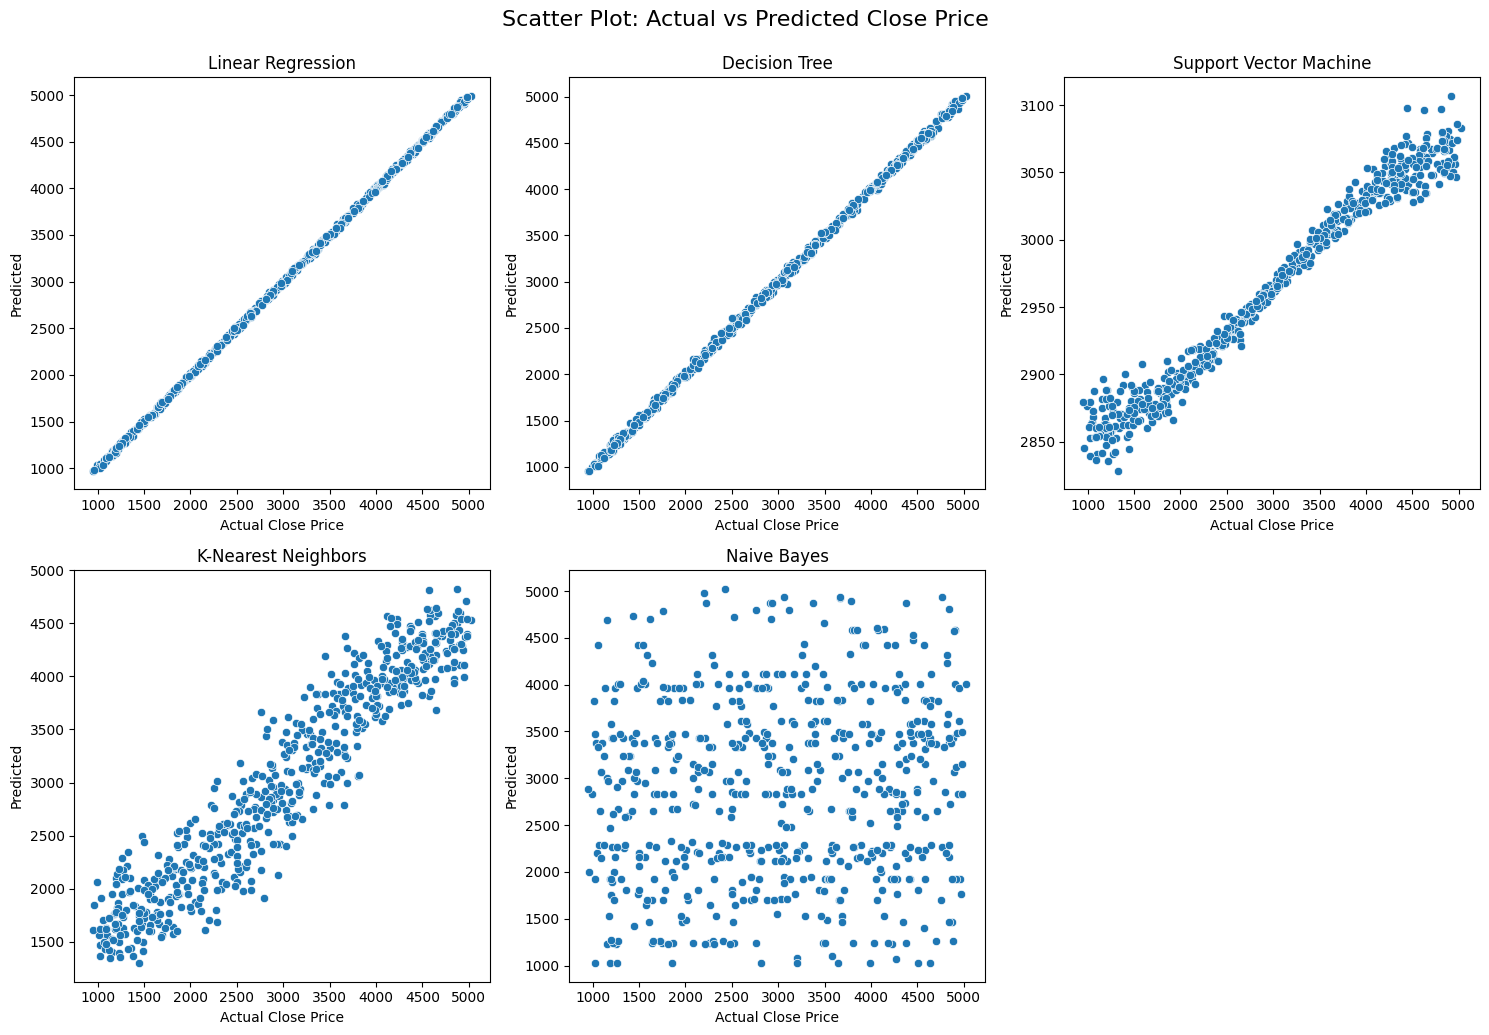

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Scatter Plot: Y_test vs Predictions dari masing-masing model ---

models = {
    'Linear Regression': pred_lr,
    'Decision Tree': pred_dt,
    'Support Vector Machine': pred_svm,
    'K-Nearest Neighbors': pred_knn,
    'Naive Bayes': pred_nb
}

plt.figure(figsize=(15, 10))
for i, (name, pred) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=Y_test, y=pred)
    plt.xlabel("Actual Close Price")
    plt.ylabel("Predicted")
    plt.title(f"{name}")

plt.tight_layout()
plt.suptitle("Scatter Plot: Actual vs Predicted Close Price", fontsize=16, y=1.03)
plt.show()


Saya membuat scatter plot untuk membandingkan harga penutupan aktual (Y_test) dengan prediksi dari masing-masing model: Linear Regression, Decision Tree, Support Vector Machine, K-Nearest Neighbors, dan Naive Bayes. Setiap model dipetakan dalam subplot, yang memungkinkan perbandingan visual dari kinerja prediksi setiap model terhadap data aktual. Scatter plot ini membantu untuk melihat seberapa dekat prediksi dengan nilai aktual, yang memberi gambaran tentang akurasi model-model tersebut.

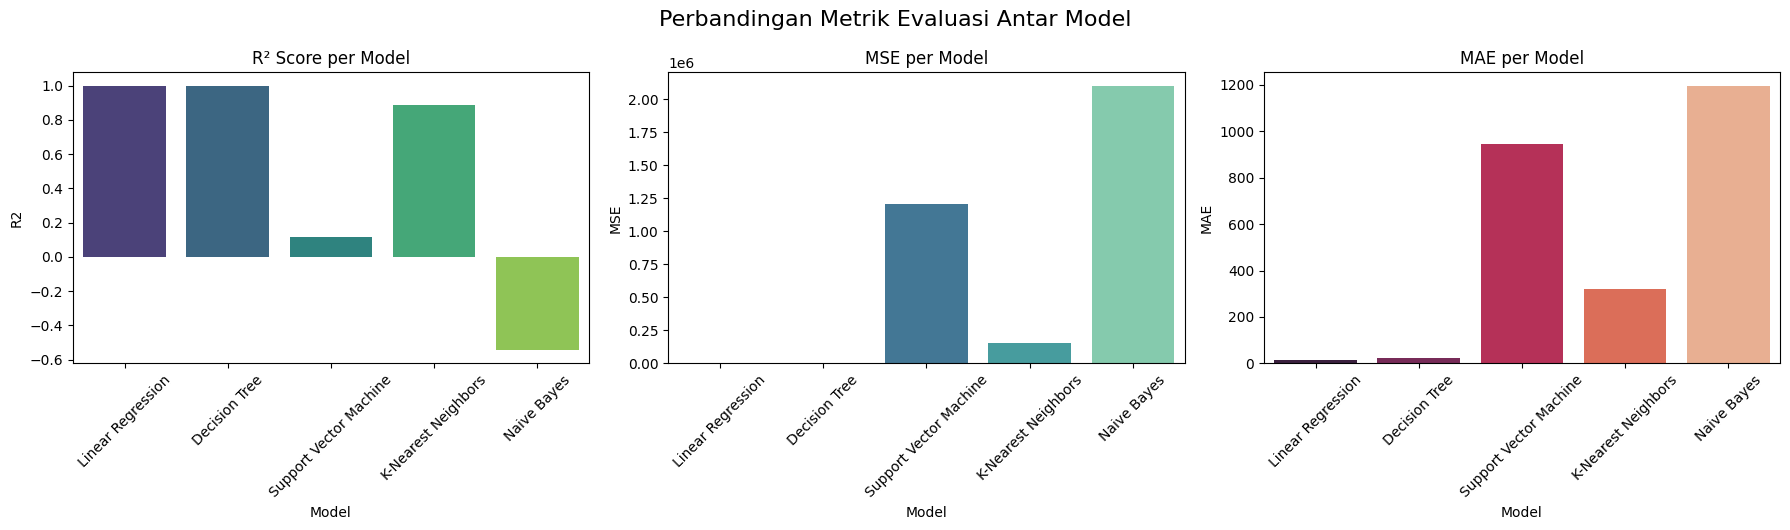

In [ ]:
# Plot bar chart dari R2, MSE, MAE
df_results_plot = df_results.copy()
df_results_plot['Model'] = df_results_plot.index
df_results_plot = df_results_plot.reset_index(drop=True)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# R² Score
sns.barplot(data=df_results_plot, x='Model', y='R2', hue='Model', ax=axs[0], palette='viridis', legend=False)
axs[0].set_title("R² Score per Model")
axs[0].tick_params(axis='x', rotation=45)

# MSE
sns.barplot(data=df_results_plot, x='Model', y='MSE', hue='Model', ax=axs[1], palette='mako', legend=False)
axs[1].set_title("MSE per Model")
axs[1].tick_params(axis='x', rotation=45)

# MAE
sns.barplot(data=df_results_plot, x='Model', y='MAE', hue='Model', ax=axs[2], palette='rocket', legend=False)
axs[2].set_title("MAE per Model")
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle("Perbandingan Metrik Evaluasi Antar Model", fontsize=16, y=1.05)
plt.show()


Saya membuat bar chart untuk membandingkan metrik evaluasi (R², MSE, dan MAE) dari berbagai model yang diuji. Dengan menggunakan subplots, saya menampilkan R², MSE, dan MAE untuk setiap model di kolom yang terpisah. Bar chart ini memudahkan untuk melihat perbandingan kinerja setiap model secara visual, yang membantu dalam mengevaluasi mana model yang paling efektif berdasarkan metrik-metrik tersebut.

In [ ]:
# Buat dictionary untuk simpan hasil evaluasi
results = {}

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, Y_train)
pred_lr = lr.predict(X_test_scaled)
results['Linear Regression'] = {
    'MSE': mean_squared_error(Y_test, pred_lr),
    'MAE': mean_absolute_error(Y_test, pred_lr),
    'R2': r2_score(Y_test, pred_lr)
}

# 2. Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, Y_train)
pred_dt = dt.predict(X_test)
results['Decision Tree'] = {
    'MSE': mean_squared_error(Y_test, pred_dt),
    'MAE': mean_absolute_error(Y_test, pred_dt),
    'R2': r2_score(Y_test, pred_dt)
}

# 3. Support Vector Machine
svm = SVR(kernel='rbf')
svm.fit(X_train_scaled, Y_train)
pred_svm = svm.predict(X_test_scaled)
results['Support Vector Machine'] = {
    'MSE': mean_squared_error(Y_test, pred_svm),
    'MAE': mean_absolute_error(Y_test, pred_svm),
    'R2': r2_score(Y_test, pred_svm)
}

# 4. K-Nearest Neighbors
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, Y_train)
pred_knn = knn.predict(X_test_scaled)
results['K-Nearest Neighbors'] = {
    'MSE': mean_squared_error(Y_test, pred_knn),
    'MAE': mean_absolute_error(Y_test, pred_knn),
    'R2': r2_score(Y_test, pred_knn)
}

# 5. Naive Bayes
Y_train_nb = Y_train.round().astype(int)
Y_test_nb = Y_test.round().astype(int)
nb = GaussianNB()
nb.fit(X_train, Y_train_nb)
pred_nb = nb.predict(X_test)
results['Naive Bayes'] = {
    'MSE': mean_squared_error(Y_test_nb, pred_nb),
    'MAE': mean_absolute_error(Y_test_nb, pred_nb),
    'R2': r2_score(Y_test_nb, pred_nb)
}

# Tampilkan hasil evaluasi semua model
print("\n=== Perbandingan Performa Model ===")
df_results = pd.DataFrame(results).T
print(df_results.sort_values(by='R2', ascending=False))



=== Perbandingan Performa Model ===
                                 MSE          MAE        R2
Linear Regression       2.640876e+02    13.199864  0.999806
Decision Tree           8.847208e+02    23.505317  0.999349
K-Nearest Neighbors     1.527194e+05   319.793130  0.887567
Support Vector Machine  1.202722e+06   946.542851  0.114547
Naive Bayes             2.098341e+06  1194.208333 -0.544813


**Kesimpulan Hasil Analisis Model Supervised Learning**

Berdasarkan evaluasi terhadap lima algoritma Supervised Learning menggunakan metrik Mean Squared Error (MSE), Mean Absolute Error (MAE), dan R² (koefisien determinasi), didapatkan hasil sebagai berikut:

1. **Linear Regression** menunjukkan performa terbaik dengan nilai MSE terkecil (264.09), MAE terkecil (13.20), dan nilai R² tertinggi (0.9998). Ini menunjukkan model ini hampir sempurna dalam memprediksi data target.

2. **Decision Tree** menempati posisi kedua dengan performa cukup baik (R² = 0.9993), meskipun error-nya sedikit lebih tinggi dibanding Linear Regression.

3. **K-Nearest Neighbors** (KNN) menghasilkan prediksi yang cukup akurat namun tidak sebaik dua model pertama (R² = 0.8876).

4. **Support Vector Machine (SVM) dan Naive Bayes** menunjukkan performa yang buruk, dengan nilai R² yang sangat rendah bahkan negatif pada Naive Bayes, yang mengindikasikan bahwa prediksi lebih buruk daripada model konstan (baseline).

5. Secara keseluruhan, Linear Regression merupakan model terbaik untuk dataset ini.

#**Unsupervised Learning**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv("World Happiness Report.csv", sep=';')

# Membersihkan nama kolom (opsional tapi dianjurkan)
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace(r'[^\w\s]', '', regex=True)

# Pilih fitur numerik yang akan digunakan untuk clustering
features = [
    'Happiness_score',
    'Social_support',
    'Healthy_life_expectancy',
    'Freedom_to_make_life_choices',
    'Generosity',
    'Perceptions_of_corruption',
    'Economy_GDP_per_Capita'  # pastikan nama ini sesuai hasil pembersihan kolom
]

X = df[features]

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(df.head())

  Country_name  Happiness_Rank  Happiness_score  Upperwhisker  Lowerwhisker  \
0      Finland               1              781           787           775   
1      Denmark               2              765           771           758   
2  Switzerland               3              756           763           749   
3      Iceland               4              750           762           739   
4       Norway               5              749           756           742   

   Economy_GDP_per_Capita  Social_support  Healthy_life_expectancy  \
0                     129             150                       96   
1                     133             150                       98   
2                     139             147                      104   
3                     133             155                      100   
4                     142             150                      101   

   Freedom_to_make_life_choices  Generosity  Perceptions_of_corruption  
0                            66

Saya memuat dataset "World Happiness Report.csv" dan melakukan pembersihan nama kolom untuk memudahkan analisis, seperti menghapus spasi dan karakter non-alfanumerik. Kemudian, saya memilih fitur numerik yang relevan untuk clustering, seperti skor kebahagiaan, dukungan sosial, harapan hidup sehat, kebebasan membuat pilihan hidup, kemurahan hati, persepsi korupsi, dan ekonomi GDP per kapita. Terakhir, saya menerapkan standarisasi menggunakan StandardScaler untuk fitur-fitur tersebut agar dapat digunakan dalam algoritma clustering lebih lanjut.

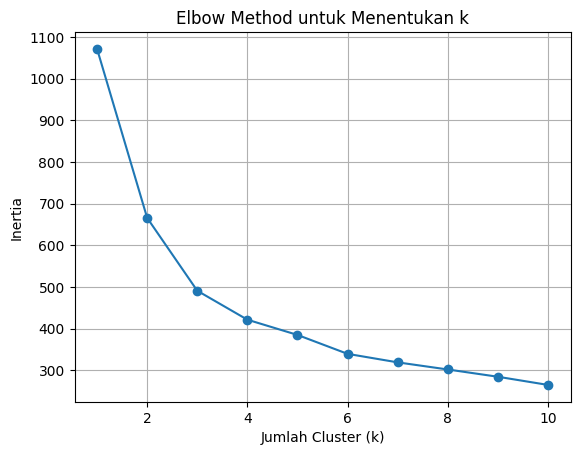

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan k')
plt.grid(True)
plt.show()

# Terapkan K-Means, misal k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

Saya menerapkan metode Elbow untuk menentukan jumlah cluster optimal (k) dengan menganalisis nilai inertia pada berbagai nilai k. Dengan menggunakan KMeans, saya menguji k antara 1 hingga 10, dan memplot hasilnya untuk melihat titik "elbow" yang menunjukkan jumlah cluster yang ideal. Berdasarkan grafik tersebut, saya memilih k=3 dan kemudian menerapkan KMeans dengan 3 cluster untuk mengelompokkan data, dan hasilnya saya simpan di kolom 'Cluster_KMeans' pada dataset.

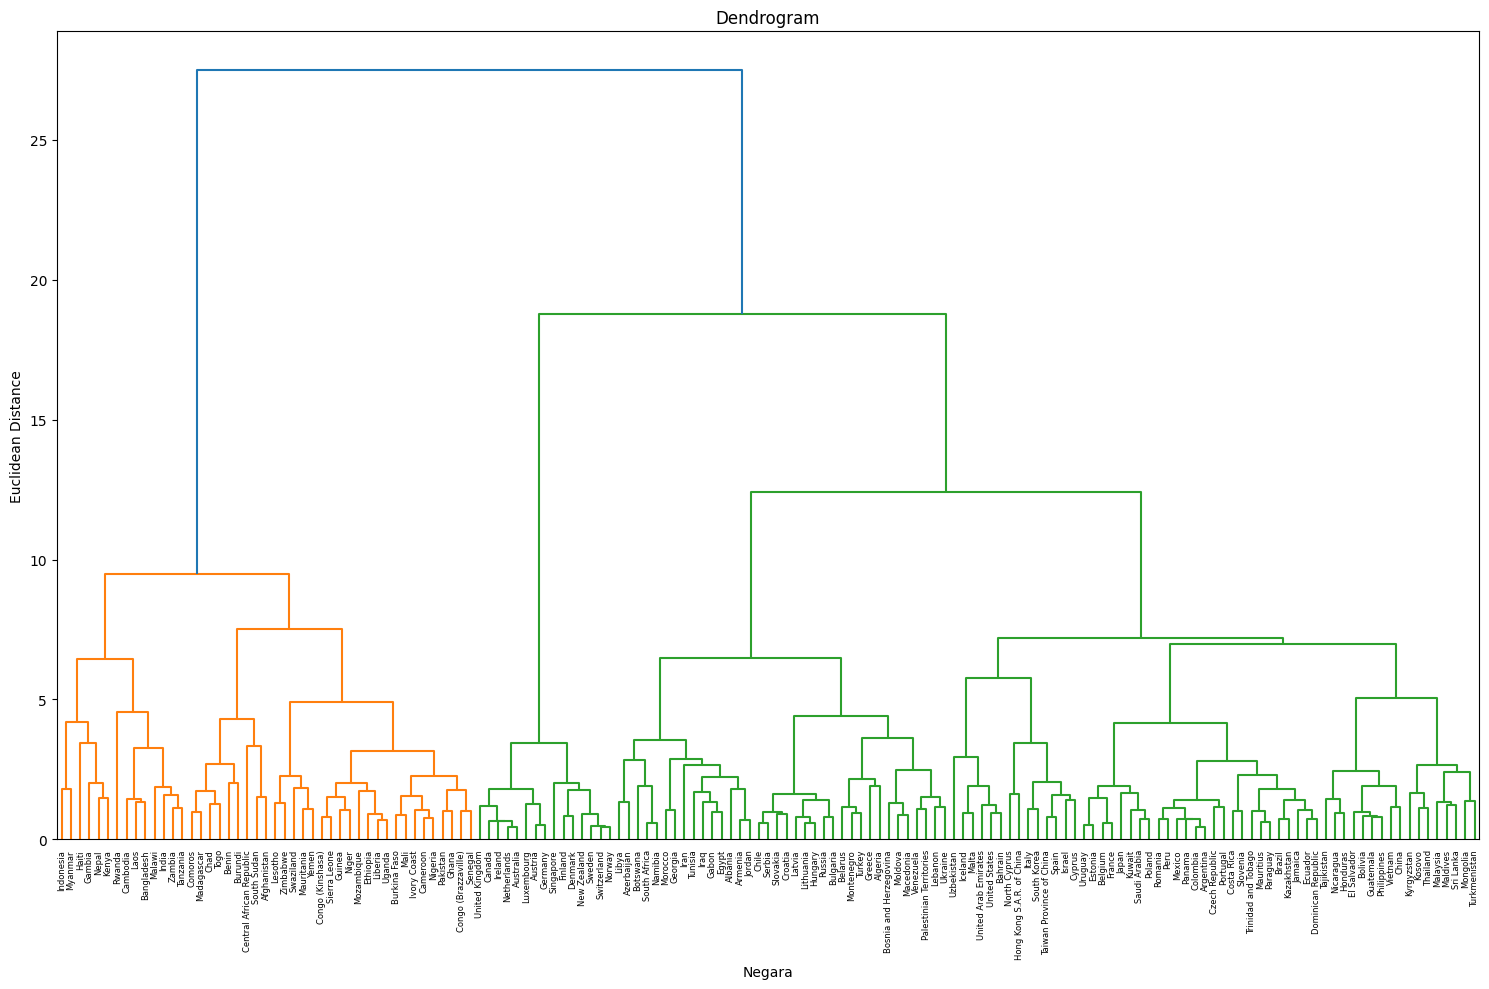

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(15, 10))
dendrogram(linked, labels=df['Country_name'].values, leaf_rotation=90, leaf_font_size=6)
plt.title('Dendrogram')
plt.xlabel('Negara')
plt.ylabel('Euclidean Distance')
plt.tight_layout()
plt.show()

#Terapkan Hierarical Clustering, misal k=3
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3)
df['Cluster_HC'] = hc.fit_predict(X_scaled)

Saya menggunakan metode Hierarchical Clustering untuk mengelompokkan negara berdasarkan data yang telah distandarisasi. Pertama, saya membuat dendrogram dengan metode Ward untuk visualisasi hubungan antar negara, yang membantu menentukan jumlah cluster yang optimal. Setelah itu, saya menerapkan Agglomerative Clustering dengan k=3 untuk membagi negara ke dalam tiga cluster, dan hasilnya saya simpan pada kolom 'Cluster_HC' dalam dataset.

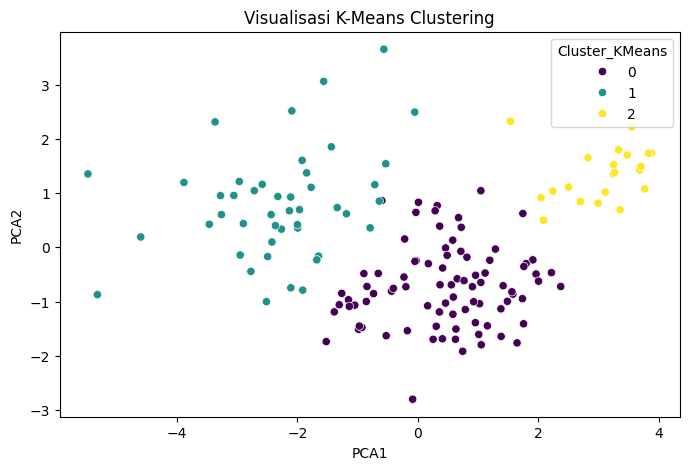

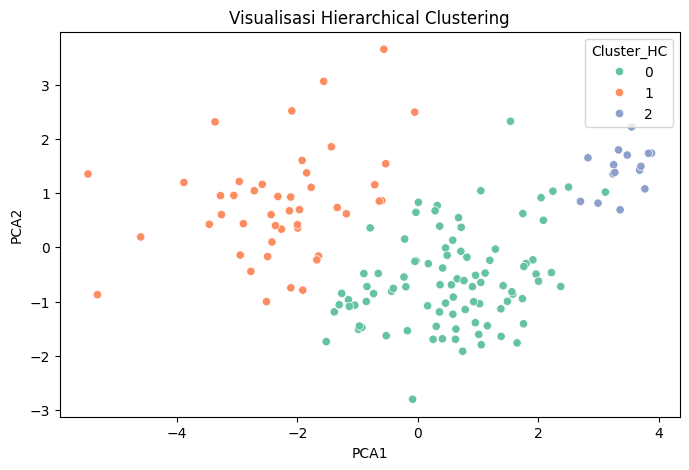

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# K-Means
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster_KMeans', palette='viridis')
plt.title('Visualisasi K-Means Clustering')
plt.show()

# Hierarchical
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster_HC', palette='Set2')
plt.title('Visualisasi Hierarchical Clustering')
plt.show()


Saya menerapkan Principal Component Analysis (PCA) untuk mereduksi dimensi data menjadi dua komponen utama, yaitu PCA1 dan PCA2, yang kemudian saya tambahkan ke dalam dataset. Setelah itu, saya memvisualisasikan hasil clustering dengan dua metode berbeda: K-Means dan Hierarchical Clustering, menggunakan scatter plot. Pada plot K-Means, saya mewarnai titik berdasarkan cluster yang diperoleh dari K-Means, dan pada plot Hierarchical, saya menggunakan warna yang berbeda untuk menunjukkan cluster yang terbentuk dengan Hierarchical Clustering.